# Problemática a resolver

Los aldeanos de la isla en la que te encuentras son víctimas de conflictos entre tribus. El método más usado para resolver conflictos ha sido el envenenamiento de aguas enemigas.
Una de las tribus está diseñando un detector de veneno. Ellos lograron identificar las 10 características mínimas y requeridas que hacen de una sustancia una sustancia venenosa para su especie (veneno.csv). Tu has recibido un dataset (sustancias_diversas.csv) de 500 sustancias diversas con las 10 características, estas sustancias fueron encontradas en distintos lagos cada una. La idea es clausurar lagos infectados. La tropa que cerrará los lagos infectados tiene sólo 50 miembros, tu debes entregar un dataset con las primeros 50 lagos que cerrará cada miembro de la tropa.

Inicialmente se importan las librerias necesarias.

In [31]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Exploración de los datos

In [44]:
df = pd.read_csv("sustancias_diversas.csv", header=0)
target = pd.read_csv("veneno.csv", header=0)
print("El dataset de entranamiento posee", len(df), "muestras")
df.head(3)

El dataset de entranamiento posee 500 muestras


,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,y
0,24.7,48.5,2449.5,133.0,5044.5,1.2,2.2,3.8,568.8,19.9,908.71
1,21.0,56.2,2114.7,163.7,4559.6,1.0,2.1,3.8,542.8,23.7,963.02
2,18.2,56.8,2055.4,150.3,4718.8,0.8,2.4,4.6,431.6,23.5,1352.93


In [37]:
# Se verifica el archivo de referencia del veneno
target.head()

,caracteristica,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10
0,valor,21,56,2131.4,164.6,4527.9,1,2.09,3.8,538,23.7


In [38]:
# La columna de caracteristica no es relevante, se desprecia
target = target.drop("caracteristica", axis=1)
target.head(3)

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10
0,21,56,2131.4,164.6,4527.9,1,2.09,3.8,538,23.7


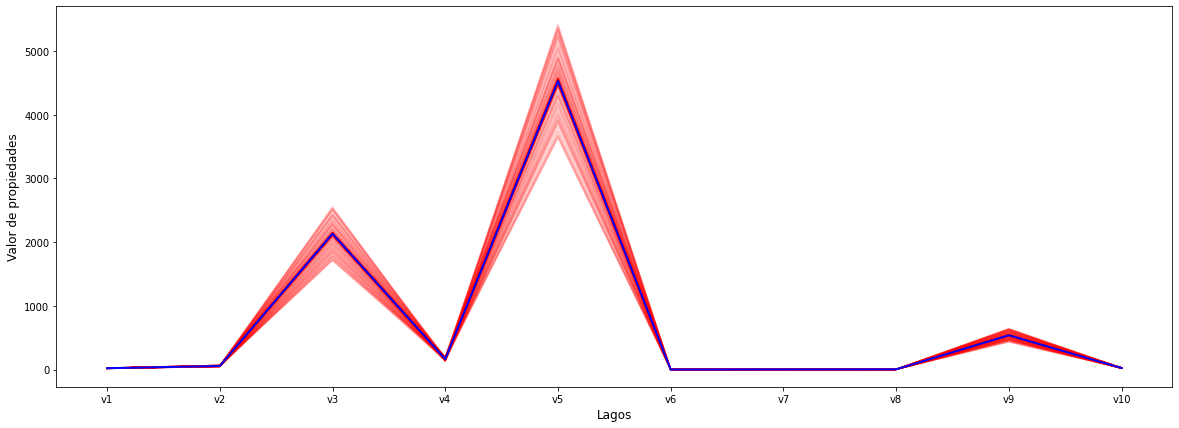

In [39]:
# Se grafican los datos de entrenamiento en bruto
def plot_raw_data(variables, x_label, y_label, df, target):
    plt.figure(figsize=(20,7), facecolor='w', edgecolor='k')
    for i in range(0, len(df)-1):
        plt.plot(df.iloc[i],alpha=0.05, color='red')
    plt.xlabel(x_label,fontsize=12)
    plt.ylabel(y_label,fontsize=12)
    plt.plot(target.iloc[0], linewidth=2, color='blue')
    # plt.legend(variables,fontsize=12)
variables = ['veneno']
plot_raw_data(variables, "Lagos", "Valor de propiedades", df, target)

# print(df.iloc[0])

La gráfica muestra que todas las sustancias tienen la misma tendencia en sus variables con alguna desviación estándar a la del veneno, para identificar los más cercanos un buen enfoque consiste en cálcular la distancia entre cada uno de los puntos del dataset con el valor target del veneno, las distancias menores serán las más probables a ser veneno.

# Solución a partir de distancias entre datos

In [42]:
# calculo de distancias entre puntos por medio del valor absoluto de la diferencia entre cada uno de los 500 valores del dataset y el valor target
count = -1
diff = 0
y = []
# se recorre cada fila del dataset
for row in range(0, len(df)):
    for i in target:
        count += 1
        if i != 'caracteristica' and count >= 1:
            # se realiza una sumatoria de cada error ya que se asume que todos los valores tienen el mismo peso
            diff = diff + np.abs(df.iloc[row][count] - target[i][0])
    count = -1
    # el valor de la fila en cuestion para la columna y es la sumatoria previamente relacionada
    y.append(diff)

#poner valor en archivo csv
df['y'] = y
df.to_csv("sustancias_diversas.csv", index=False)


In [43]:
sorted_lakes = df.copy()
sorted_lakes = sorted_lakes.sort_values('y')
print("Lagos a clausurar")
output = sorted_lakes.head(50)
sorted_lakes.head(50).to_csv("urgente_orden_de_cierre.csv", index=False)
sorted_lakes.head(50)

Lagos a clausurar


,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,y
0,24.7,48.5,2449.5,133.0,5044.5,1.2,2.2,3.8,568.8,19.9,908.71
1,21.0,56.2,2114.7,163.7,4559.6,1.0,2.1,3.8,542.8,23.7,963.02
2,18.2,56.8,2055.4,150.3,4718.8,0.8,2.4,4.6,431.6,23.5,1352.93
3,20.8,56.0,2112.9,165.9,4503.9,1.0,2.1,3.8,533.9,23.9,1401.04
4,21.0,56.4,2146.7,166.0,4492.2,1.0,2.1,3.8,543.2,23.7,1459.05
5,20.8,56.5,2126.7,164.1,4486.6,1.0,2.1,3.8,534.0,23.9,1510.26
6,19.6,51.6,2283.4,153.9,5066.1,0.9,2.2,4.0,486.3,23.8,2267.77
7,21.2,55.6,2136.6,166.1,4523.4,1.0,2.1,3.8,536.3,23.7,2281.08
8,21.1,55.6,2141.6,163.9,4531.8,1.0,2.1,3.8,534.4,23.5,2300.09
9,20.9,55.5,2131.6,164.4,4504.4,1.0,2.1,3.8,543.0,23.5,2329.70


Los valores mas probables a ser venenosos corresponden a los primeros 50 y se encuentran en el archivo nombrado